**CALORIES BURNT PREDICTION**

LOADING DATASET's

In [ ]:
import pandas as pd
cal=pd.read_csv('calories.csv')
print(cal)
exer=pd.read_csv('exercise.csv')
print(exer)

        User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0  

PRINTING COLUMNS OF DATASET's

In [ ]:
print(exer.columns)
print(cal.columns)

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')
Index(['User_ID', 'Calories'], dtype='object')


CHECKING FOR NULL VALUES

In [ ]:
print(cal['Calories'].isnull().sum())
print(exer['Body_Temp'].isnull().sum())

0
0


DESCRIPTION OF DATASETS

In [ ]:
print(cal.info())
print(exer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB
None


GETTING STATISTICAL INFORMATION

In [ ]:
print(exer.describe)
print(cal.describe)

<bound method NDFrame.describe of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]>
<bo

MERGING DATASETS

In [ ]:
final_data = pd.merge(cal, exer, on='User_ID')
print(final_data.head())
final_data = final_data[['Calories','Gender', 'Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']]
print(final_data.head())

    User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0  14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1  14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2  11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3  16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4  17771927      35.0  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  
0       40.8  
1       40.3  
2       38.7  
3       40.5  
4       39.8  
   Calories  Gender  Age  Height  Weight  Heart_Rate  Body_Temp
0     231.0    male   68   190.0    94.0       105.0       40.8
1      66.0  female   20   166.0    60.0        94.0       40.3
2      26.0    male   69   179.0    79.0        88.0       38.7
3      71.0  female   34   179.0    71.0       100.0       40.5
4      35.0  female   27   154.0    58.0        81.0       39.8


VISUALIZATIONS

<Axes: xlabel='Gender', ylabel='count'>

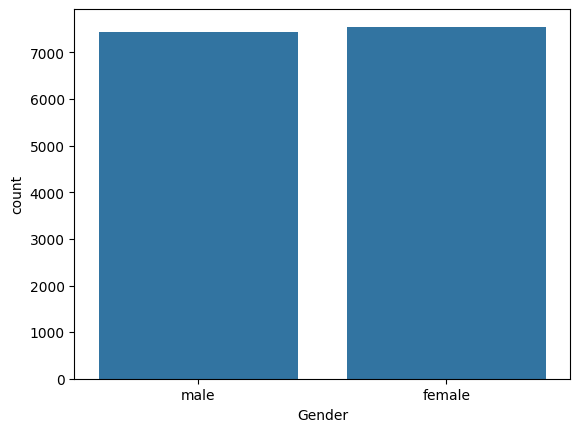

In [ ]:
import seaborn as sns
sns.countplot(data=final_data, x='Gender')

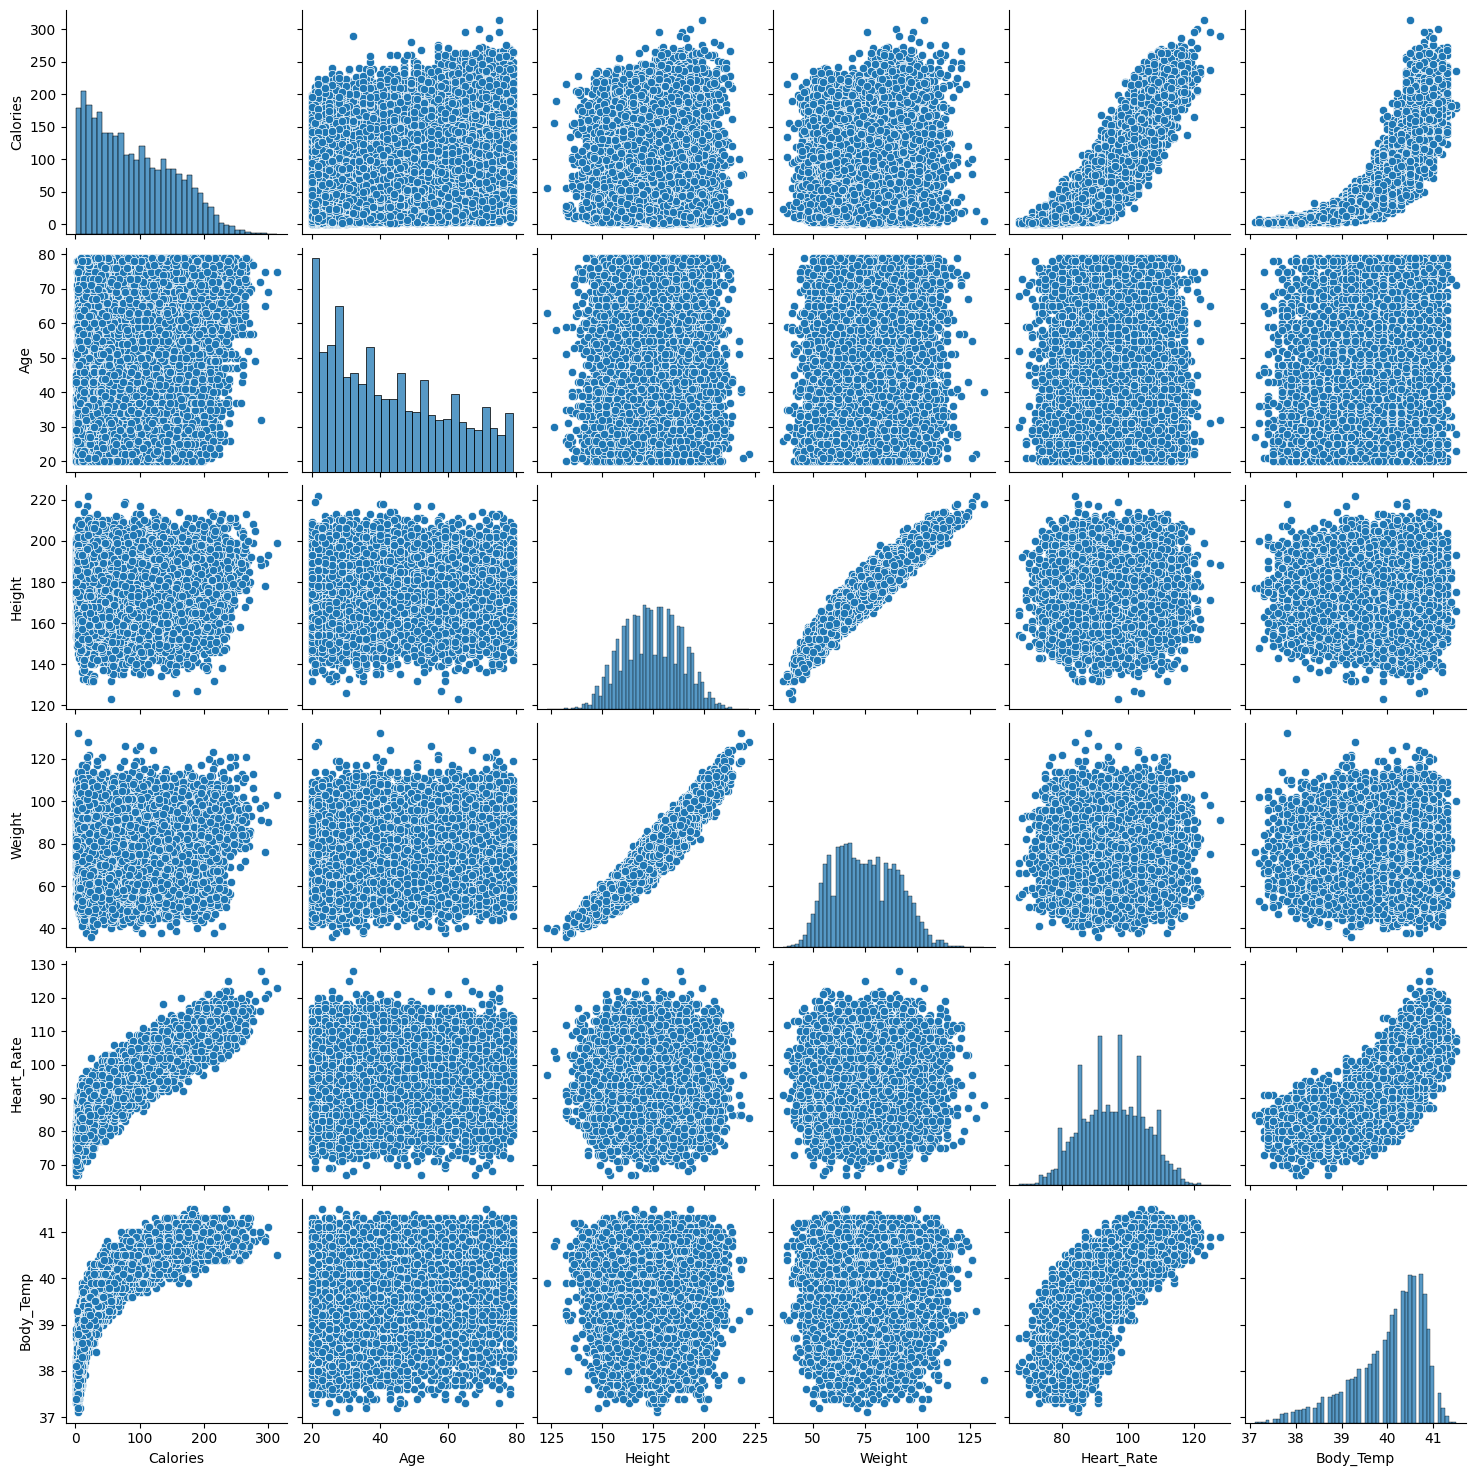

In [ ]:
sns.pairplot(data=final_data)

In [ ]:
print(final_data.columns)
print(final_data['Gender'].value_counts())

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')
Gender
female    7553
male      7447
Name: count, dtype: int64


DATASET PREPROCESSING(ENCODING)

In [ ]:
# OrdinalEncoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
x=final_data[['Gender','Age','Height','Weight','Heart_Rate','Body_Temp']]
y=final_data['Calories']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
or_en=OrdinalEncoder(categories=[['female','male']])
X_train['Gender'] = or_en.fit_transform(X_train[['Gender']])
X_test['Gender'] = or_en.transform(X_test[['Gender']])

CHECKING AFTER ENCODING

In [ ]:
or_en.categories_ #female=0, male=1

[array(['female', 'male'], dtype=object)]

APPLYING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[151.9423598  157.13149315  72.75658231 ...  68.80486687 153.92740608
 145.53429563]


TAKING USER INPUT AND PREDICTING RESULT

In [ ]:
gender=int(input("Enter you gender:(0 for female, 1 for male)"))
age=int(input("Enter your age: "))
height=float(input("Enter your height: "))
weight=float(input("Enter your weight: "))
heartrate=float(input("Enter your heart rate: "))
bodytemp=float(input("Enter your body temperature: "))
user_ip=[[gender,age,height,weight,heartrate,bodytemp]]
out=model.predict(user_ip)
print("Your Total Calories Burnt is: ",out[0] )

Enter you gender:(0 for female, 1 for male)0
Enter your age: 20
Enter your height: 5.3
Enter your weight: 41
Enter your heart rate: 88
Enter your body temperature: 42
Your Total Calories Burnt is:  118.54757227105438


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


VISUALIZATIONS

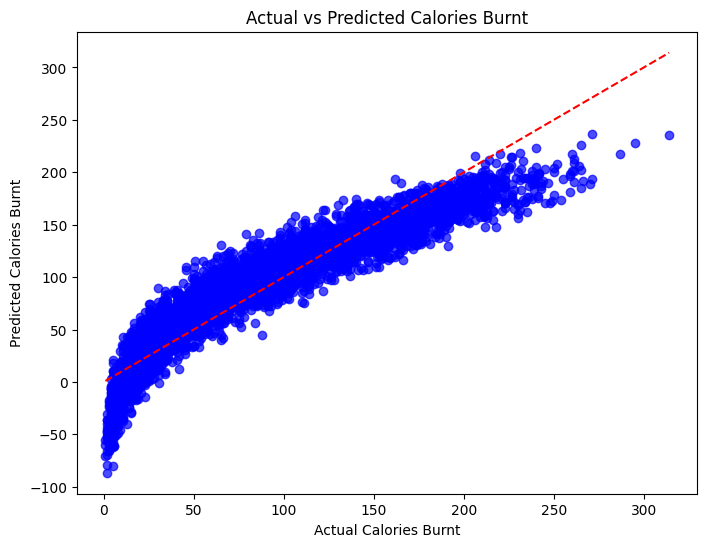

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted Calories Burnt')
plt.xlabel('Actual Calories Burnt')
plt.ylabel('Predicted Calories Burnt')
plt.show()

        User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Your Total Calories Burnt is:  124.71035488672942


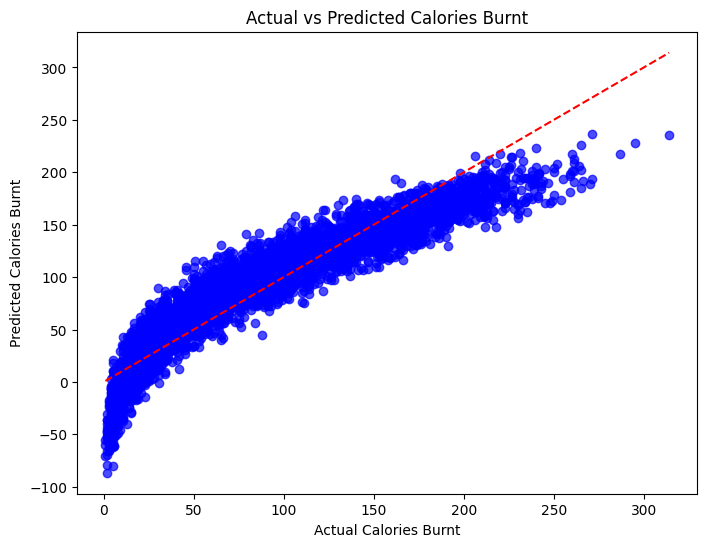

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
cal=pd.read_csv('calories.csv')
print(cal)
exer=pd.read_csv('exercise.csv')
print(exer)
final_data = pd.merge(cal, exer, on='User_ID')
print(final_data.head())
final_data = final_data[['Calories','Gender', 'Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']]
print(final_data.head())
x=final_data[['Gender','Age','Height','Weight','Heart_Rate','Body_Temp']]
y=final_data['Calories']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
or_en=OrdinalEncoder(categories=[['female','male']])
X_train['Gender'] = or_en.fit_transform(X_train[['Gender']])
X_test['Gender'] = or_en.transform(X_test[['Gender']])
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# print(y_pred)
gender=int(input("Enter you gender:(0 for female, 1 for male)"))
age=int(input("Enter your age: "))
height=float(input("Enter your height: "))
weight=float(input("Enter your weight: "))
heartrate=float(input("Enter your heart rate: "))
bodytemp=float(input("Enter your body temperature: "))
user_ip=[[gender,age,height,weight,heartrate,bodytemp]]
out=model.predict(user_ip)
print("Your Total Calories Burnt is: ",out[0] )
#plotting
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted Calories Burnt')
plt.xlabel('Actual Calories Burnt')
plt.ylabel('Predicted Calories Burnt')
plt.show()